# Practice using OpenStreetMap
#### The world has a ton of benches

In [1]:
import requests
import pandas as pd

## Load the data
- You can use Taginfo API
- In this case, we downloaded the amenity key which you can download using this API

In [2]:
key = 'amenity'
url = "https://taginfo.openstreetmap.org/api/4/key/values"
response = requests.get(url, params={
    'key': key,
    'page': 0, 'rp': 100,
    'sortname': 'count', 'sortorder': 'desc'
})

data = response.json()['data']

df = pd.DataFrame(data).set_index('value')
df[['count', 'description']].head()

,count,description
value,,
parking,3620288,A place for parking cars
bench,1363351,A place for people to sit; allows room for sev...
place_of_worship,1203225,A place where religious services are conducted
restaurant,1107034,A restaurant sells full sit-down meals with se...
school,1071448,A primary or secondary school (pupils typicall...


## Visualize:
- Can see that the most used amenity key is parking, then bench, then place of worhip, and so on.

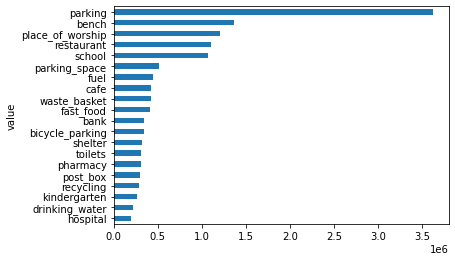

In [3]:
df.iloc[:20][::-1]['count'].plot(kind = 'barh', color = 'C0')

## Download data: Overpass API and Overpass QL
- search for the number of restaurants in Austria that are listed in openstreetmap
- 'total': 12536 restaurants

In [4]:
overpass_url = "http://overpass-api.de/api/interpreter"
overpass_query = """
    [out:json];
    area["ISO3166-1"="AT"][admin_level=2]->.search;
    node[amenity='restaurant'](area.search);
    out count;
"""

response = requests.get(overpass_url, params={'data': overpass_query})
response.json()

{'version': 0.6,
 'generator': 'Overpass API 0.7.56.7 b85c4387',
 'osm3s': {'timestamp_osm_base': '2020-10-21T01:39:02Z',
  'timestamp_areas_base': '2020-10-21T01:03:02Z',
  'copyright': 'The data included in this document is from www.openstreetmap.org. The data is made available under ODbL.'},
 'elements': [{'type': 'count',
   'id': 0,
   'tags': {'nodes': '12536',
    'ways': '0',
    'relations': '0',
    'areas': '0',
    'total': '12536'}}]}

In [12]:
overpass_url = "http://overpass-api.de/api/interpreter"
overpass_query = """
    [out:json];
    node["amenity"="pub"](53.2987342,-6.3870259,53.4105416,-6.1148829); 
    out;
"""
# specify a bounding box by (south, west, north, east) in latitude and longitude
response = requests.get(overpass_url, params={'data': overpass_query})
response.json()

{'version': 0.6,
 'generator': 'Overpass API 0.7.56.6 474850e8',
 'osm3s': {'timestamp_osm_base': '2020-10-21T03:11:04Z',
  'copyright': 'The data included in this document is from www.openstreetmap.org. The data is made available under ODbL.'},
 'elements': [{'type': 'node',
   'id': 130156802,
   'lat': 53.3501917,
   'lon': -6.2527615,
   'tags': {'addr:city': 'Dublin',
    'addr:country': 'IE',
    'addr:housenumber': '21',
    'addr:street': 'Store Street',
    'amenity': 'pub',
    'name': 'Le Monde Café Bar',
    'phone': '+353 1 8134700',
    'website': 'https://www.beresfordhotelifsc.com/en/bar/',
    'wheelchair': 'no'}},
  {'type': 'node',
   'id': 132228340,
   'lat': 53.3087656,
   'lon': -6.1966601,
   'tags': {'amenity': 'pub',
    'food': 'yes',
    'name': 'The Punch Bowl',
    'opening_hours': 'Su 12:00-23:00; Mo-Th 11:00-23:30; Fr,Sa 11:00-00:30',
    'phone': '+353-1-283-2356',
    'website': 'http://www.theoldpunchbowl.ie',
    'wheelchair': 'limited',
    'wheelch

## Store data: PostGIS
- Geospatial Extension for PostgreSQL
- Offers various spatial types like geometry and geography
- Have various spatial Indexes like r-tree, quad-tree, and kd-tree
- Have various Spatial Functions that you can apply during your search
    - Have an SQL query like you always do, but can say 'I want the length of this line' (using ST_Length) or 'I want the area of this region (using ST_X)
    - There are a lot of available functions

## GeoPandas:
- Dataframes with a geospatial column
- Geospatial extension for Pandas
- Uses shapely for geometric operations and fiona for file access
- Visualization depends on descartes and matplotlib

### Need to start a new environment
- start a fresh environment (like what we did in class - could solve dependency errors)

## Loading PostGIS Table as GeoPandas DataFrame

In [7]:
!pip install psycopg2-binary

     |████████████████████████████████| 1.5 MB 2.6 MB/s eta 0:00:01


In [9]:
!pip install geopandas

     |████████████████████████████████| 962 kB 2.2 MB/s eta 0:00:01     |███████████████████▍            | 583 kB 2.2 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 4.1 MB/s eta 0:00:01
     |████████████████████████████████| 14.0 MB 10.7 MB/s eta 0:00:01
     |████████████████████████████████| 13.0 MB 4.1 MB/s eta 0:00:01


In [10]:
import psycopg2
import geopandas as gpd

In [ ]:
with psycopg2.connect(database="osm_data_science_db", user = "postgres", 
                      password='password', host='localhost') as connection